In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import datetime
# auto reolad zewnetrznych skryptow bez resetowania notebooka
import sys
sys.path.append('..')
import models
from utils.modeling_utils import SequenceGeneratorCV

%reload_ext autoreload
%autoreload 2

DEVICE = "cpu"

### określenie optymalnej liczby składowych

In [2]:
import json

models = ['baseline','ar_seq2seq', 'ar_seq2seq_pca', 'dnn_seq2seq', 'rnn_seq2seq']
cv_setting = ['training_incremental', 'training_moving']

data = []

for model in models:
    for cv_s in cv_setting:
        with open(f'../trained_models/{model}/{cv_s}/best_model_info.json', 'r') as f:
            d = json.load(f)['loss_val']
        data.append([model, cv_s] + d)

df = pd.DataFrame(data, columns=['model', 'cv_setting'] + [f'fold_{i}' for i in range(4)])
df = pd.melt(df, id_vars=['model', 'cv_setting'], value_vars=[f'fold_{i}' for i in range(4)])

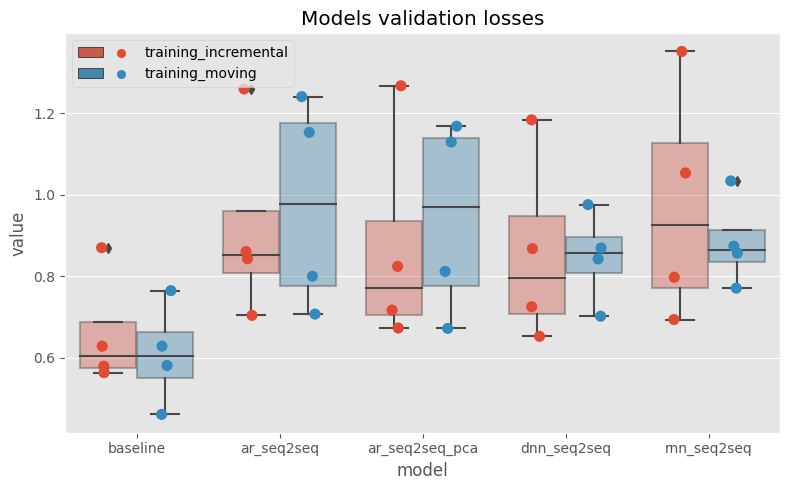

In [3]:
from matplotlib.legend_handler import HandlerTuple

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.boxplot(df, x='model', y='value', hue='cv_setting', ax=ax, boxprops={'alpha': 0.4})
sns.stripplot(df, x='model', y='value', hue='cv_setting', dodge=True, ax=ax, s=8)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=['training_incremental', 'training_moving'], loc='upper left', 
          handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None)})

ax.set_title('Models validation losses')
fig.tight_layout()

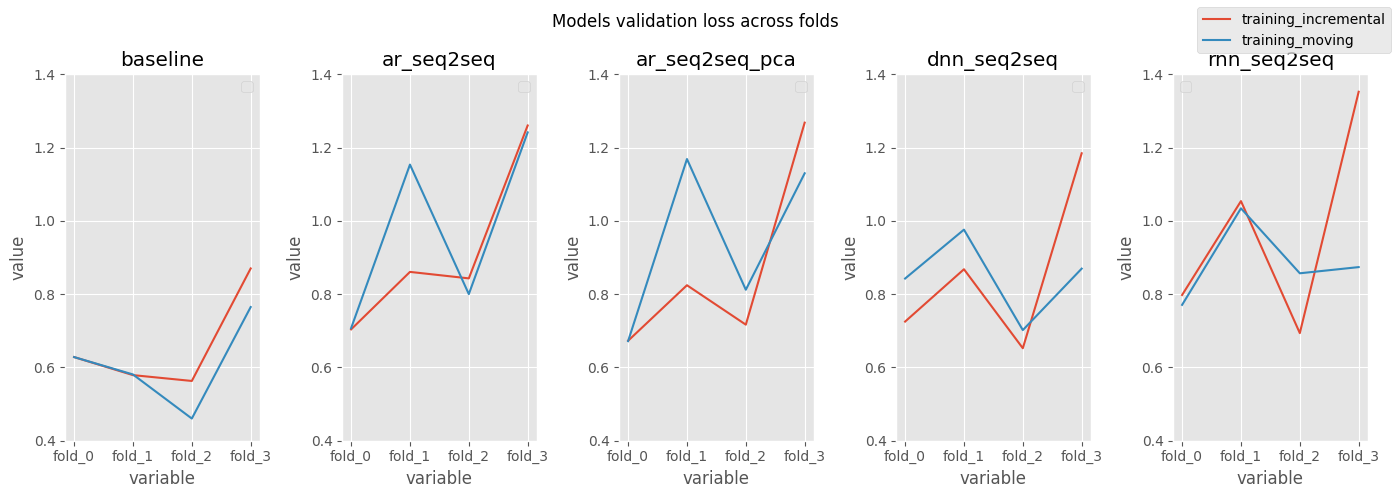

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(14, 5))

for idx, model in enumerate(df.model.unique()):
    sns.lineplot(df[df['model']==model], x='variable', y='value', hue='cv_setting', ax=ax[idx],)# legend=False)
    ax[idx].set_title(model), ax[idx].set_ylim([0.4, 1.4])

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=['training_incremental', 'training_moving'])
for i in ax: i.legend([])
fig.suptitle('Models validation loss across folds')
fig.tight_layout()